In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data and a always asking those 6 questions

In [3]:
df = pd.read_csv('Dataset/yield_df.csv')
df.head()
# df.drop('Unnamed: 0', axis=1, inplace=True)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## Whenever the Output is Boolean we ofenly use classification problem
## But when we want a numerical value as output we use Regression

In [5]:
df.shape

(28242, 8)

In [6]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [8]:
df.duplicated().sum() # np.int64(2310)

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [12]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [13]:
df['average_rain_fall_mm_per_year'].value_counts()

average_rain_fall_mm_per_year
1083.0    4048
1761.0    2277
758.0     1472
494.0     1449
1668.0     966
          ... 
626.0       42
641.0       42
847.0       39
83.0        29
241.0       24
Name: count, Length: 100, dtype: int64

## Transforming Average_rain_fall_per_year

### In summary this code incadicates the indices of rows in the dataframe of where the value in the colomn 'average_rain_fall_per_year' are not numeric but Strings. These rows can be considered for removal of further processing depending on the specific use case.

In [14]:
def isstr(obj):
    try:
        float(obj)
        return False
    except:
        return True

# df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].apply(lambda x: x.replace(',', '') if isstr(x) else x)

In [15]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isstr)].index

In [16]:
df = df.drop(to_drop)

In [17]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


<Axes: xlabel='count', ylabel='Area'>

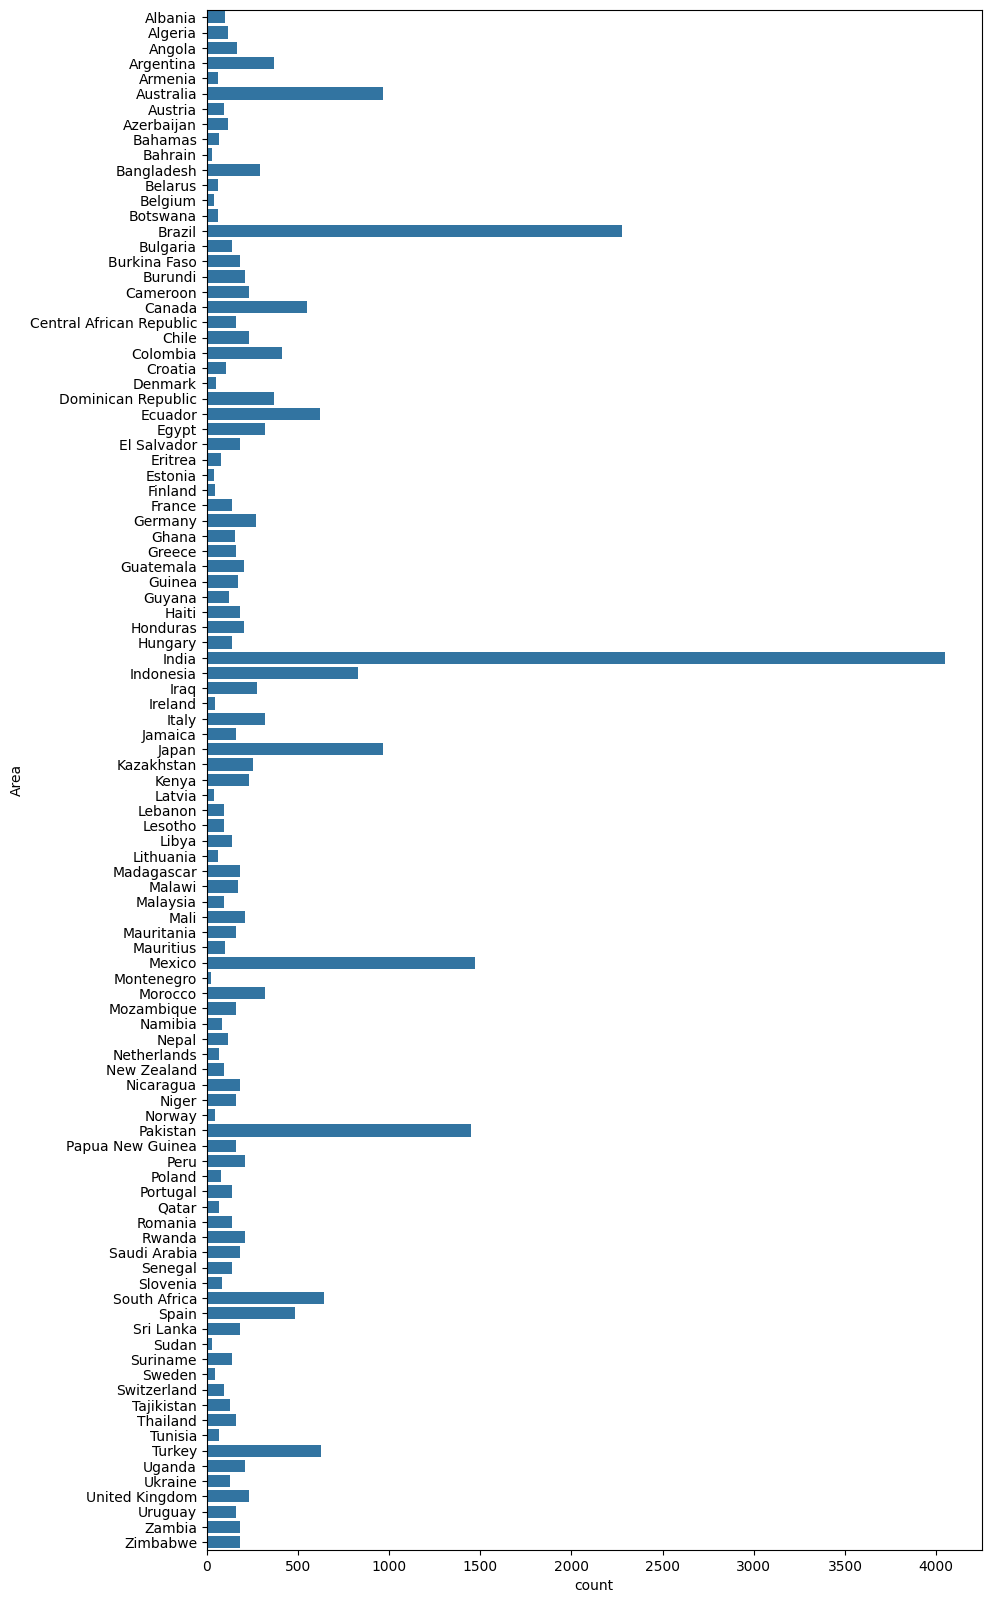

In [18]:
plt.figure(figsize=(10,20))  # 10 = Height and 20 = Width
sns.countplot(y=df['Area'])

## Yeild Per Country

In [19]:
country = df['Area'].unique()

In [20]:
yeild_per_country = []
for state in country:
    yeild_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

df['hg/ha_yield'].sum()

np.int64(2176140205)

<Axes: >

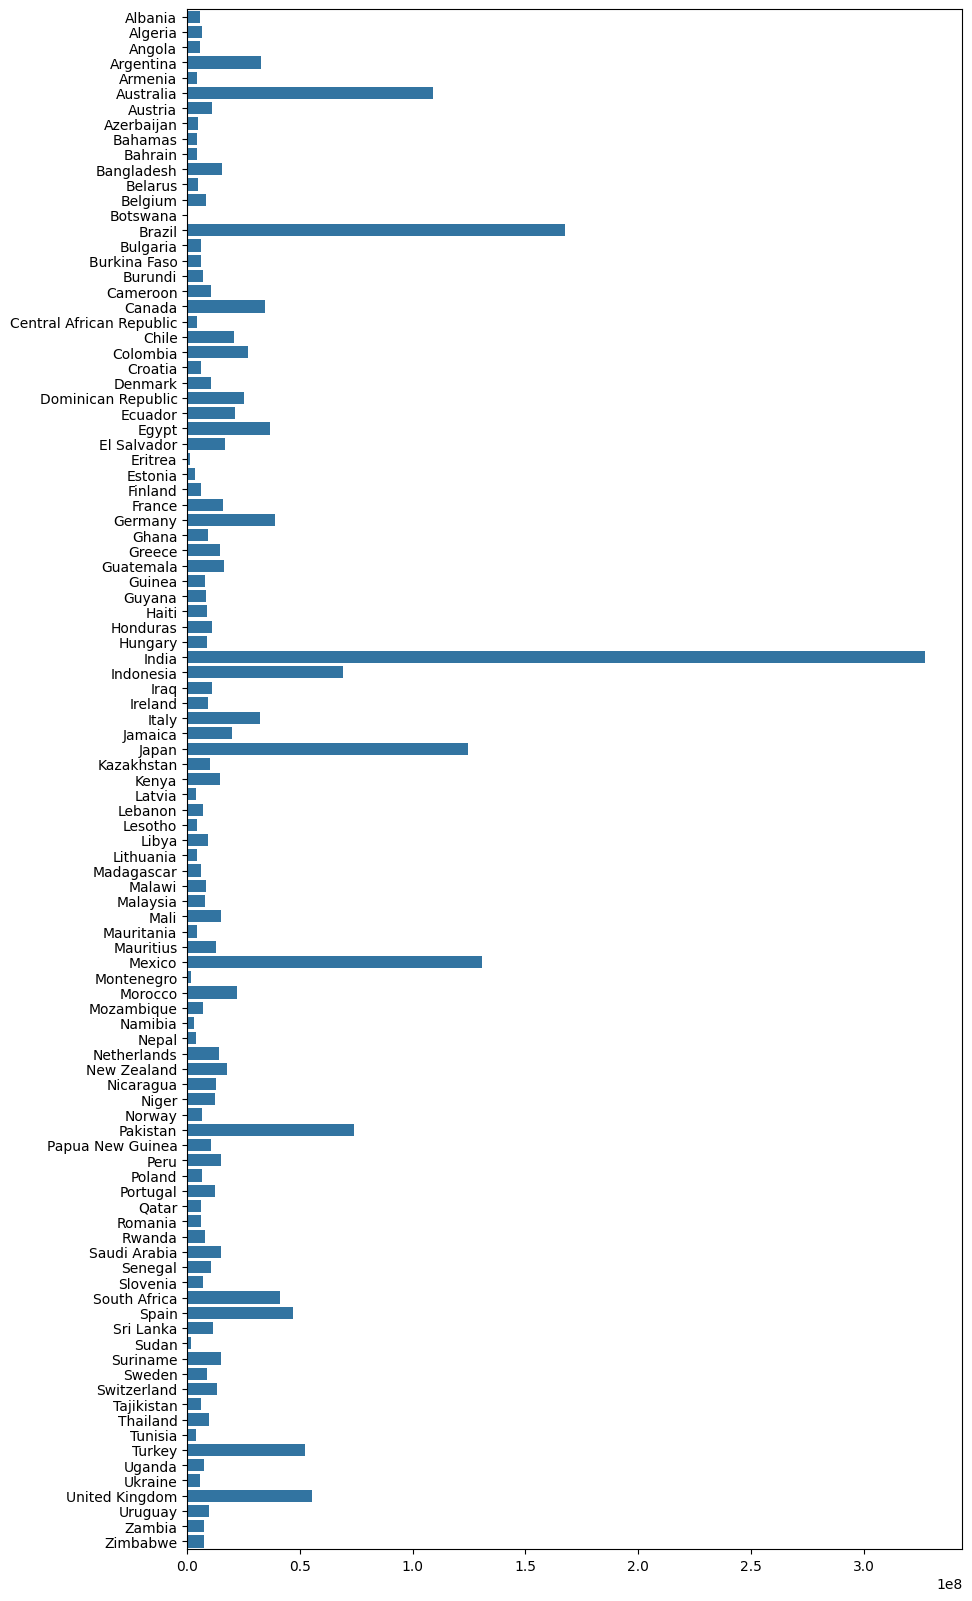

In [21]:
plt.figure(figsize=(10,20))
sns.barplot(x=yeild_per_country, y=country)

<Axes: xlabel='count', ylabel='Item'>

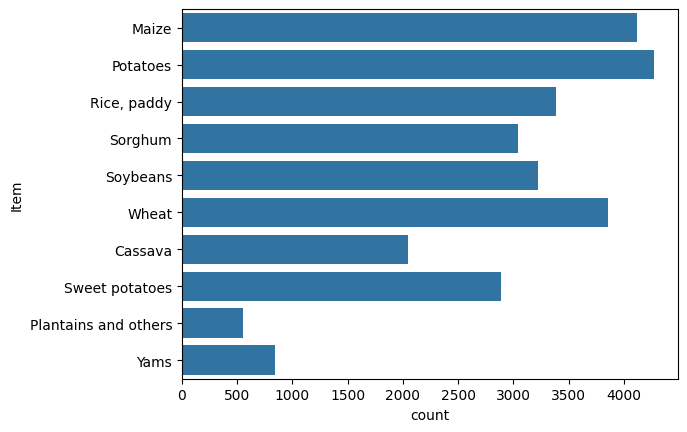

In [22]:
sns.countplot(y = df['Item'])

## Yeild Vs. Item

In [23]:
crops = df['Item'].unique()
crops

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [24]:
crop_yield_per_item = []
for crop in crops:
    crop_yield_per_item.append(df[df['Item'] == crop]['hg/ha_yield'].sum())
crop_yield_per_item

[np.int64(149633801),
 np.int64(854351426),
 np.int64(137994713),
 np.int64(56634127),
 np.int64(53924312),
 np.int64(116158445),
 np.int64(307730510),
 np.int64(344077024),
 np.int64(58958974),
 np.int64(96676873)]

<Axes: >

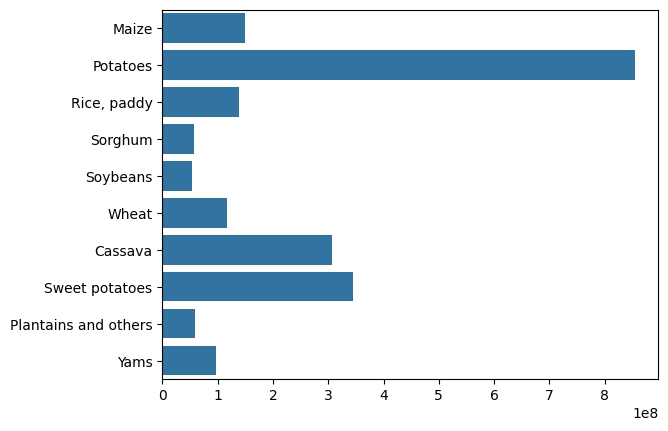

In [25]:
sns.barplot(y= crops, x=crop_yield_per_item)

## Train Test Split

In [26]:
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [27]:
x=df.drop('hg/ha_yield', axis=1)
y=df['hg/ha_yield']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((22593, 6), (5649, 6))

### Now we Have to convert the area and Item which are in string type which is categorical Values into Numerical value for fast and possible computation

### And After that the Most Important part will be to standarize those data or Scaling in other words

### we will be using one-hot encoder to convert the string label into binary metrix which will make our computaion fast but but but
### if we try to first standard scale all the data points and then try for data encoding it will not only consume our time but also give proble while taing the input from the user i.e user will give us the input in regular format and we have to convert them all into our scale then predict the result 

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
ohe = OneHotEncoder(drop ='first')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('oneHotEncoder' , ohe, [4,5]),
        ('standardization' , scaler, [0,1,2,3])
    ],
remainder = 'passthrough'
)

In [32]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHotEncoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standardization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [33]:
x_train_dummy = preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.transform(x_test)


x_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 133839 stored elements and shape (22593, 113)>

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [35]:
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}
    


for name, model in models.items():
    model.fit(x_train_dummy, y_train)
    y_pred = model.predict(x_test_dummy)
    print(f'{name} : {mean_absolute_error(y_test, y_pred)} Score {model.score(x_test_dummy, y_test)*100}')

lr : 29582.453584194187 Score 75.51426755127231
lss : 29565.021687814206 Score 75.51159177529814
rg : 29530.403634831084 Score 75.52110960346484
knr : 4398.787112763321 Score 98.4982575456172
dtr : 3621.149406974686 Score 97.97425121874153


## How to determine which Model to choose among so many options

### 1. We Choose the model with Higest Score and lowest mean squared error
### 2. So we choose the best option i.e Decision Tree ( even it Does'nt require standarization and one Hot Encoder)

In [36]:
dtr = DecisionTreeRegressor()   ## We Will be going to pickle this File
dtr.fit(x_train_dummy, y_train)
dtr.predict(x_test_dummy)  # Yeilds the predicted values per country

array([ 69220.,  25000.,  51206., ..., 252775.,  24615.,  23187.])

### Predictive System

In [37]:
def prediction(Year,	average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp,	Area,	Item):
    features = np.array([[Year,	average_rain_fall_mm_per_year,	pesticides_tonnes,	avg_temp,	Area,	Item]])

    # Now we have to on-hot encode and standarize this input also

    transformed_features = preprocessor.transform(features)
    predicted_value = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]
    

In [38]:
x_test.head()
prediction(1996,	1513.0,	152.01,	19.71,	'Madagascar',	'Wheat')

C:\Users\Sharma's\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Sharma's\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25000.])

## Now Pickle The File

In [39]:
import pickle
pickle.dump(dtr, open('CropYeild.pkl', 'wb'))
pickle.dump(preprocessor, open('Preprocessor.pkl', 'wb'))

# So we succesfully imported our pickle file and Moved it to new Application file ( Actually we dont need the ipynb file anymore as we trained our model)

In [40]:
x_test.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
25564,2008,636.0,40719.00,17.21,Spain,"Rice, paddy"
18113,1996,1513.0,152.01,19.71,Madagascar,Wheat
25607,2010,636.0,39043.00,16.51,Spain,Sorghum
6815,2007,3240.0,82439.06,27.45,Colombia,Potatoes
18144,2000,1513.0,130.46,19.65,Madagascar,Sweet potatoes
